# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.2)

# Generating Data

In [3]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [5]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1','x2','target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


# Data Visualization

Text(0.5, 1.0, 'Classification Of Data To The Model')

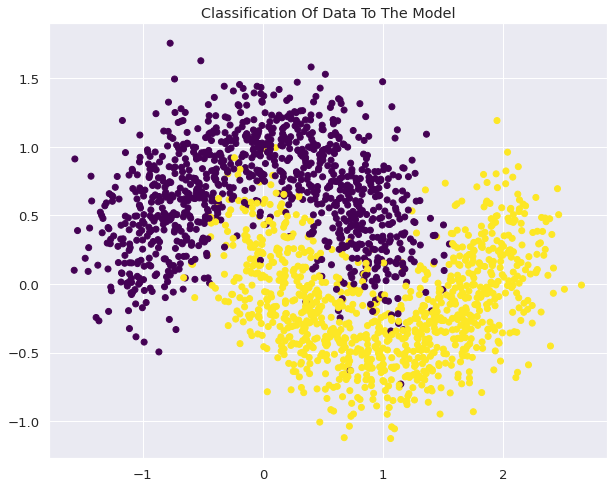

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('Classification Of Data To The Model')

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1500, 2)
X_test shape: (500, 2)
y_train shape: (1500,)
y_test shape: (500,)


# Visualization Of The Training And Test Set

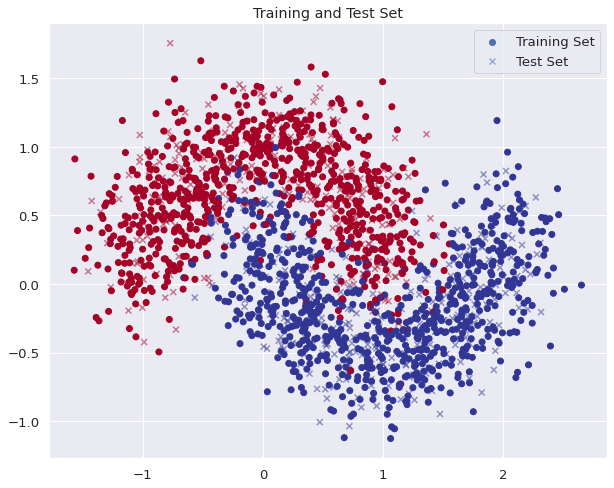

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu',
            label='Training Set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x',
            alpha=0.5, label='Test Set')
plt.title('Training and Test Set')
plt.legend()
plt.show()

# Selection Of Optimal Parameters - Grid Search

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20]}
grid_search = GridSearchCV(classifier, param_grid= params, scoring='accuracy',
                           cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    

In [14]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



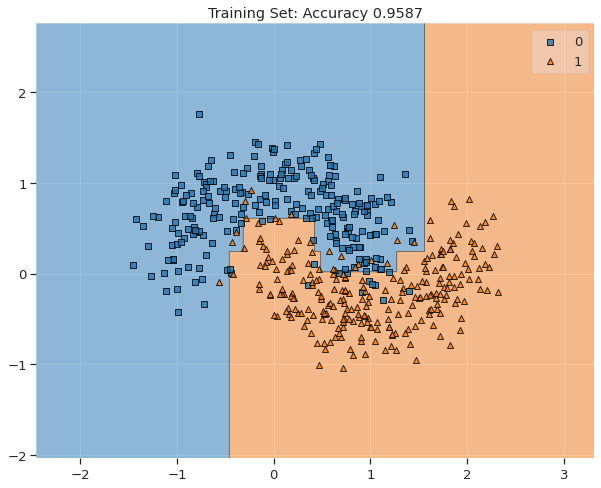

In [16]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Training Set: Accuracy {grid_search.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



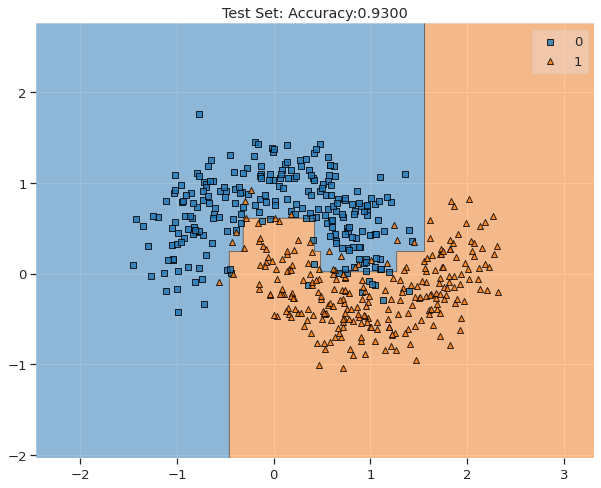

In [17]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Test Set: Accuracy:{grid_search.score(X_test,y_test):.4f}')
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(1,10),
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1,
                           scoring='accuracy', cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [19]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

In [20]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



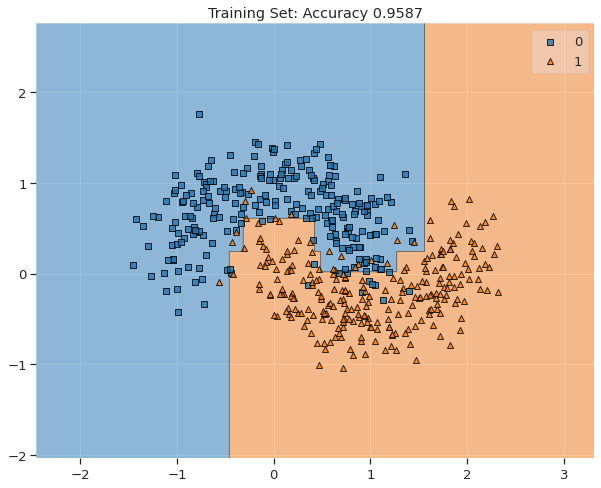

In [21]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Training Set: Accuracy {grid_search.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



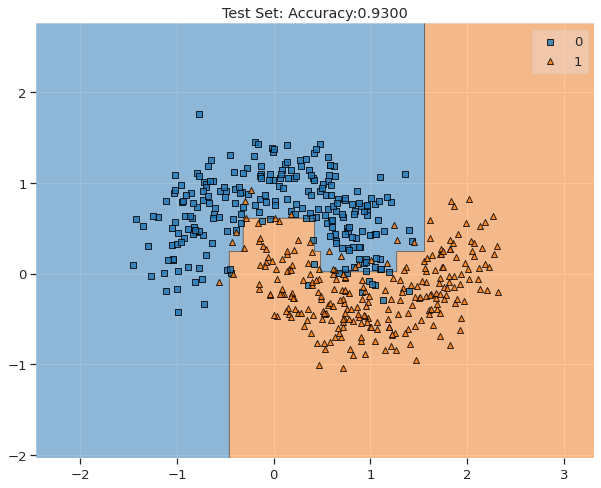

In [22]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Test Set: Accuracy:{grid_search.score(X_test,y_test):.4f}')
plt.show()

In [23]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid=[
            {'criterion':['gini'], 'max_depth':[1,2,3,4,5]},
            {'criterion':['entropy'], 'min_samples_leaf':[2,3,4,5]}
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, 
                           scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
  

In [24]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [25]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,10),
    'min_samples_leaf':[4,5,6,7,8,9,10],
    'n_estimators':[50]
}
grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1,
                           scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [27]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'n_estimators': 50}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



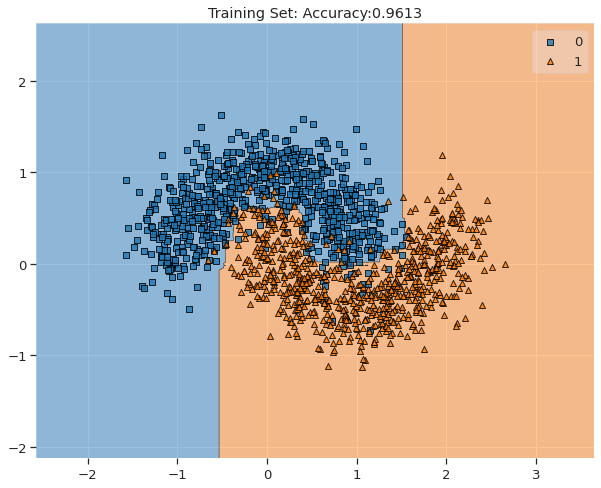

In [29]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Training Set: Accuracy:{grid_search.score(X_train,y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



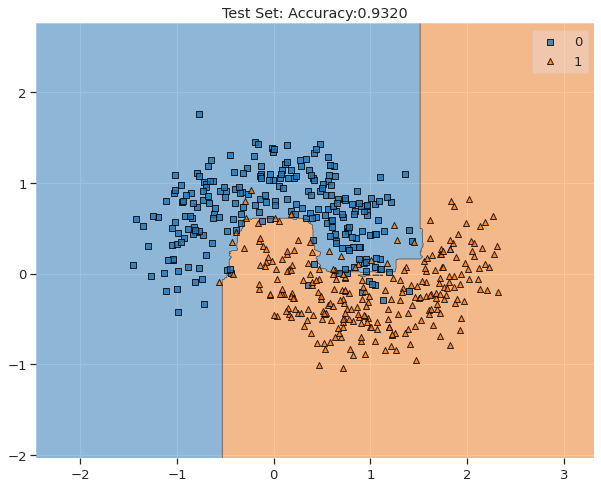

In [30]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Test Set: Accuracy:{grid_search.score(X_test,y_test):.4f}')
plt.show()